# Qiskit implementations

In this section, we'll take a look at some Qiskit implementations of the concepts introduced in this lesson.
If you wish to run these implementations yourself, which is strongly encouraged, please consult the [Install Qiskit](https://docs.quantum.ibm.com/guides/install-qiskit) page on
[IBM Quantum Documentation](https://docs.quantum.ibm.com) for details on how to get up and running with Qiskit.

It should be understood that Qiskit is under continual development, and is principally focused on maximizing the performance of the quantum computers it is used to operate, which themselves continue to evolve.
As a result, Qiskit is subject to changes that may occasionally lead to code deprecation.
With this in mind, we'll shall always execute the following commands prior to presenting examples of Qiskit code in this course, so that it is clear which version of Qiskit has been used.
Starting with Qiskit 1.0, this is a simple way to see what version of Qiskit is currently installed.

In [1]:
from qiskit import __version__
print(__version__)

2.1.1


## Vectors and matrices in Python

Qiskit uses the Python programming language, so before discussing Qiskit specifically, it may be helpful to some to very briefly discuss matrix and vector computations in Python.

In Python, matrix and vector computations can be performed using the `array` class from the `NumPy` library, which provides functionality for many numerical and scientific computations.
The following code loads this library, defines two column vectors, `ket0` and `ket1`, corresponding to the qubit state vectors $\vert 0\rangle$ and $\vert 1\rangle,$ and then prints their average.

In [2]:
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


We can also use `array` to create matrices that can represent operations.

In [3]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


Please note that all code appearing within a given lesson in this course is expected to be run sequentially.
So, we don't need to import `NumPy` again here, because it has already been imported.

Matrix multiplication, including matrix-vector multiplication as a special case, can be performed using the `matmul` function from `NumPy`.

In [4]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


This output formatting leaves something to be desired, visually speaking.
One solution, for situations that demand something prettier, is to use Qiskit's `array_to_latex` function from the `qiskit.visualization` module.
Note that, in the code that follow, we're using Python's generic `display` function.
In contrast, the specific behavior of `print` may depending on what is printed, such as it does for arrays defined by `NumPy`.

In [5]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## States, measurements, and operations

Qiskit includes several classes that allow for states, measurements, and operations to be created and manipulated — so starting from scratch and programming everything needed to simulate quantum states, measurements, and operations in Python is not required.
Some examples to help you to get started are included below.

### Defining and displaying state vectors

Qiskit's `Statevector` class provides functionality for defining and manipulating quantum state vectors.
In the code that follows, the `Statevector` class is imported and a few vectors are defined.
(We're also importing the `sqrt` function from the `NumPy` library to compute a square root.
This function could, alternatively, be called as `np.sqrt` provided that `NumPy` has already been imported, as it has above; this is just a different way to import and use this specific function alone.)

In [6]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

The `Statevector` class includes a `draw` method for displaying state vectors in a variety of ways, including
`text` for plain text, `latex` for rendered LaTeX, and `latex_source` for LaTeX code, which can be handy for cutting and pasting into documents.
(Use `print` rather than `display` to show LaTeX code for best results.)

In [7]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


The `Statevector` class also includes the `is_valid` method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):

In [8]:
display(u.is_valid())
display(w.is_valid())

True

False

### Simulating measurements using `Statevector`

Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the `measure` method from the `Statevector` class.
Let's use the same qubit state vector `v` defined previously.

In [9]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

Running the `measure` method simulates a standard basis measurement.
It returns the outcome of that measurement, plus the new quantum state vector of the system after the measurement.
(Here we're using Python's `print` function with an `f` prefix for formatted printing with embedded expressions.)

In [10]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

Measurement outcomes are probabilistic, so this method can return different results when run multiple times.
For the particular example of the vector `v` defined above, the `measure` method defines the quantum state vector after the measurement takes place to be

$$
\biggl(\frac{1 + 2i}{\sqrt{5}}\biggr) \vert 0\rangle
$$

(rather than $\vert 0\rangle$) or

$$
- \vert 1\rangle
$$

(rather than $\vert 1\rangle$), depending on the measurement outcome.
In both cases, the alternatives to $\vert 0\rangle$ and $\vert 1\rangle$ are, in fact, equivalent to these state vectors; they are said to to *equivalent up to a global phase* because one is equal to the other multiplied by a complex number on the unit circle.
This issue is discussed in greater detail in the [Quantum circuits](https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits) lesson, and can safely be ignored for now.

`Statevector` will throw an error if the `measure` method is applied to an invalid quantum state vector.

`Statevector` also comes with a `sample_counts` method that allows for the simulation of any number of measurements on the system, each time starting with a fresh copy of the state. For example, the following code shows the outcome of measuring the vector `v` $1000$ times, which (with high probability) results in the outcome $0$ approximately $5$ out of every $9$ times (or about $556$ of the $1000$ trials) and the outcome $1$ approximately $4$ out of every $9$ times (or about $444$ out of the $1000$ trials).
The code that follows also demonstrates the `plot_histogram` function from the `qiskit.visualization` module for visualizing the results.

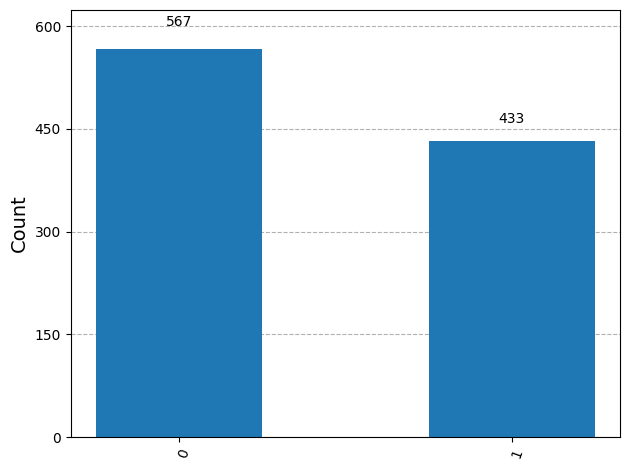

In [11]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

Running this code on your own multiple times, with different numbers of samples in place of $1000,$ may be helpful for developing some intuition for how the number of trials influences the number of times each outcome appears.
With more and more samples, the fraction of samples for each possibility is likely to get closer and closer to the corresponding probability.
This phenomenon, more generally speaking, is known as the *law of large numbers* in probability theory.

### Performing operations with `Operator` and `Statevector`

Unitary operations can be defined in Qiskit using the `Operator` class, as in the example that follows.
This class includes a `draw` method with similar arguments to `Statevector`.
Note that the `latex` option produces results equivalent to `array_from_latex`.

In [12]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

We can apply a unitary operation to a state vector using the `evolve` method.

In [13]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

### Looking ahead toward quantum circuits

Quantum circuits won't be formally introduced until the [Quantum circuits](https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits) lesson, which is the third lesson in this course, but we can nevertheless experiment with composing qubit unitary operations using Qiskit's `QuantumCircuit` class.
In particular, we may define a quantum circuit (which, in this case, will simply be a sequence of unitary operations performed on a single qubit) as follows.

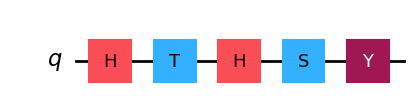

In [14]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))

Here we're using the `draw` method from the `QuantumCircuit` class with the `mpl` renderer (short for `Matplotlib`, a Python visualization library).
This is the only renderer we'll use for quantum circuits in this course, but there are other options, including a text-based and a LaTeX-based renderer.

The operations are applied sequentially, starting on the left and ending on the right in the diagram.
A handy way to get the unitary matrix corresponding to this circuit is to use the `from_circuit` method from the `Operator` class.

In [15]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

One can also initialize a starting quantum state vector and then evolve that state according to the sequence of operations described by the circuit.

In [16]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

The following code simulates an experiment where the state obtained from the circuit above is measured with a standard basis measurement 4,000 times (using a fresh copy of the state each time).

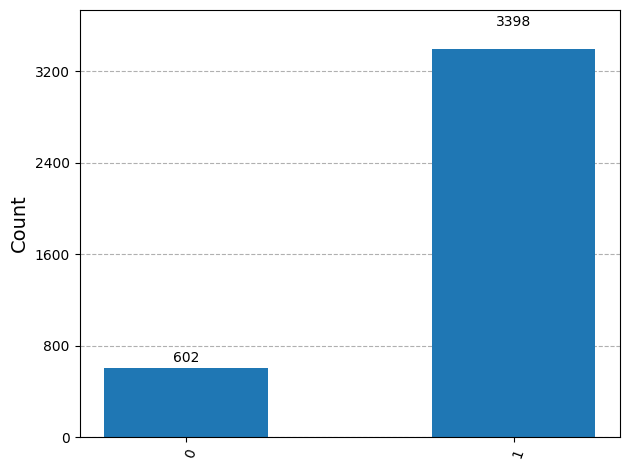

In [17]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))